<h1 align='center'>Perfomance Analysis of a classification model</h1>
<h2 align='center'>Shumbul Arifa (181CO152)</h2>

### Task
Calculating the various performance measures of breast-cancer dataset using knn classification model

Using the classification matrix, calculating:
1. Accuracy
2. Error Rate
3. Precision ( specificity, exactness)
4. Recall ( sensitivity, correctness)
5. Fscore

# Basic imports and reading the dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

# Performing KNN Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
clf_knn = KNeighborsClassifier(n_neighbors = 7)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [6]:
y_pred = clf_knn.predict(X_test)

# Performance Measures

## Part - 1 : Using python from scratch

**Formulae:**
1. Accuracy
    = (TP+TN)/(TP+FP+FN+TN)
2. Error Rate
    = 1 - Accuracy
3. Precision
    = (TP)/(TP+FP)
4. Recall
    = (TP)/(TP+FN)
5. Fscore
    = 2/(1/recall + 1/precision)

### Confusion matrix

In [7]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1])

In [8]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1])

In [9]:
#TP, TN, FP, FN
import numpy as np

y_pred_a = np.array(y_pred)
y_test_a = np.array(y_test)

TP, TN, FP, FN, i = 0,0,0,0,0
while i<len(y_test_a):
    if(y_test[i]==1 and y_pred_a[i]==1):
        TP+=1
    elif(y_test[i]==0 and y_pred_a[i]==0):
        TN+=1
    elif(y_test[i]==0 and y_pred_a[i]==1):
        FP+=1
    elif(y_test[i]==1 and y_pred_a[i]==0):
        FN+=1
    i+=1
    
conf_mat = np.array([[TP, FP],[FN, TN]], np.int32)
print("Confusion Matrix: ")
print(conf_mat)

Confusion Matrix: 
[[65  5]
 [ 1 43]]


In [10]:
recall = (TP)/(TP+FN)
print(" Recall score: ", recall)

 Recall score:  0.9848484848484849


In [11]:
precision = (TP)/(TP+FP)
print(" Precision score: ", precision)

 Precision score:  0.9285714285714286


In [12]:
f1score = 2/(1/recall + 1/precision)
print(" F1 score: ", f1score)

 F1 score:  0.9558823529411766


In [13]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
print(" Accuracy score: ", accuracy)

 Accuracy score:  0.9473684210526315


In [14]:
error = 1 - accuracy
print(" Error: ", error)

 Error:  0.052631578947368474


## Part - 2 : Using available standard libraries in python

### Confusion Matrix

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
confusion_matrix(y_test, y_pred)

array([[43,  5],
       [ 1, 65]])

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, recall_score, precision_score, f1_score

In [18]:
print(" Recall score is: ", recall_score(y_test,y_pred))

 Recall score is:  0.9848484848484849


In [19]:
print(" Precision score is: ", precision_score(y_test,y_pred))

 Precision score is:  0.9285714285714286


In [20]:
print(" F1 score: ", f1_score(y_test,y_pred))

 F1 score:  0.9558823529411765


In [21]:
print(" Accuracy score: ", accuracy_score(y_test,y_pred))

 Accuracy score:  0.9473684210526315


In [22]:
print(" Error: ", 1-accuracy_score(y_test,y_pred))

 Error:  0.052631578947368474


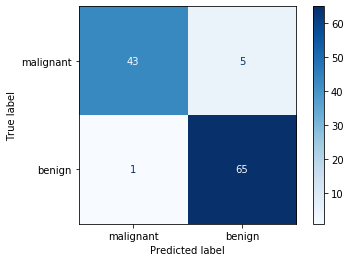

In [25]:
import matplotlib.pyplot as plt
plot_confusion_matrix(clf_knn, X_test, y_test, display_labels=data.target_names,cmap=plt.cm.Blues)  
plt.show() 

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.98      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

